## **PUTRI NUR AINI MAHFUDZ (M203Y0411)**

## **Proyek Pertama Kelas Machine Learning Terapan**

---


### Impor library yang dibutuhkan

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix

## **Data Understanding**

Penjelasan mengenai variabel yang ada pada dataset adalah sebagai berikut:
- id: merupakan parameter yang bernilai unik yang dimiliki setiap subjek.
- gender: merupakan fitur yang menyatakan jenis kelamin.
- age: merupakan fitur yang menyatakan usia.
- hypertension: merupakan fitur yang menyatakan apakah mengidap hipertensi. 0: tidak, 1: ya.
- heart_disease: merupakan fitur yang menyatakan apakah mengidap penyakit jantung. 0: tidak, 1: ya.
- ever_married: merupakan fitur yang menyatakan apakah sudah pernah menikah. 
- work_type: merupakan fitur yang menyatakan jenis pekerjaan.
- Residence_type: merupakan fitur yang menyatakan jenis tempat tinggal.
- avg_glucose_level: merupakan fitur yang menyatakan kadar gula darah rata-rata.
- bmi: merupakan fitur yang menyatakan kategori berat badan.
- smoking_status: merupakan fitur yang menyatakan kategori merokok.
- stroke: merupakan fitur target yang menyatakan apakah terdiagnosis stroke. 0: tidak, 1: ya.

### Ubah dataset menjadi dataframe, lalu tampilkan isi dataset

In [155]:
df = pd.read_csv('stroke_data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Melihat jumlah row dan column

In [156]:
df.shape

(5110, 12)

### Melihat informasi kolom pada dataset

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Melihat hitungan rata-rata, dll pada dataset

In [158]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Melihat jumlah data kosong pada setiap kolom

In [159]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Mengecek apakah ada data yang terduplikat

In [160]:
duplicates = df[df.duplicated()]
len(duplicates)

0

### Mengecek apakah data sudah seimbang atau belum

In [161]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

## Visualisasi Data

### Visualisasi Univariate Analysis

Tahapan ini dilakukan untuk melihat distribusi data setiap variabel

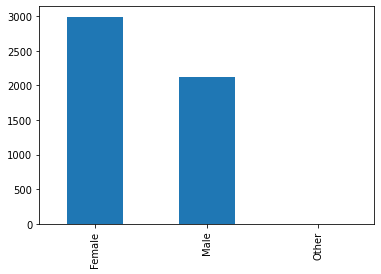

In [162]:
df['gender'].value_counts().plot(kind='bar')

Gambar 1. Distribusi gender


> Pada Gambar 1, terdapat perbandingan value antara tiga kategori yang menyatakan jenis kelamin (female, male, dan other)



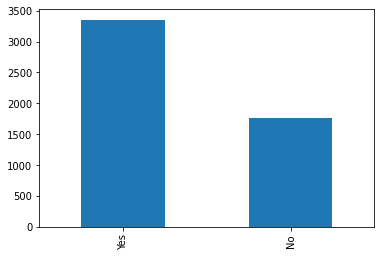

In [163]:
df['ever_married'].value_counts().plot(kind='bar')

Gambar 2. Distribusi ever_married


> Pada Gambar 2, terdapat perbandingan value antara dua kategori yang menyatakan apakah sudah pernah menikah (yes dan no)

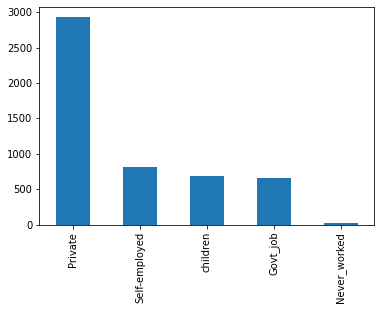

In [164]:
df['work_type'].value_counts().plot(kind='bar')

Gambar 3. Distribusi work_type

> Pada Gambar 3, terdapat perbandingan value antara lima kategori yang menyatakan jenis pekerjaan (private, self_employed, children, govt_job, never_worked)

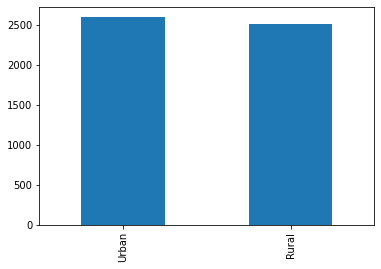

In [165]:
df['Residence_type'].value_counts().plot(kind='bar')

Gambar 4. Distribusi Residence_type

> Pada Gambar 4, terdapat perbandingan value antara dua kategori yang menyatakan jenis tempat tinggal (urban dan rural)

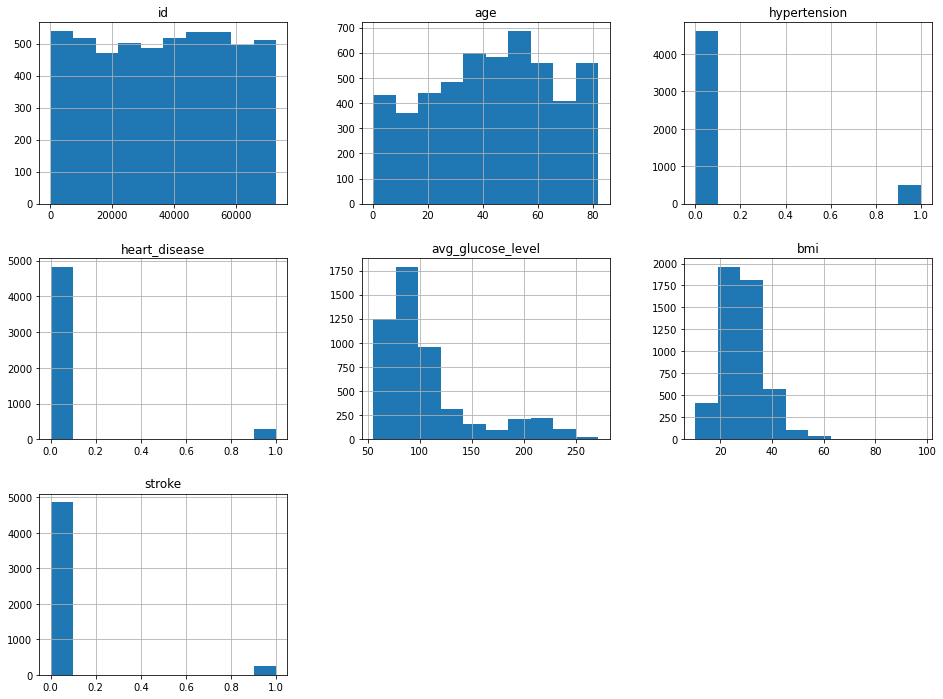

In [166]:
df.hist(figsize=(16,12))
plt.show()

Gambar 5. Distribusi dari id, age, hypertension, heart_disease, avg_glucose_level, bmi, stroke

> Pada Gambar 5, terdapat perbandingan value di fitur-fitur yang tertera

## **Data Preparation**

## Menghapus kolom yang tidak diperlukan

Kolom atau variabel yang dihapus adalah id, karena tidak memiliki kepentingan untuk dimasukkan ke dalam model

In [167]:
df.drop(['id'], axis=1, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Menghapus kategori pada kolom yang tidak diperlukan 

Kategori yang dihapus adalah unknown pada kolom smoking_status dan other pada kolom gender

In [168]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
categorical
for col in categorical:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [169]:
for col in categorical:
    print(col)
    print(df[col].unique())

gender
['male' 'female' 'other']
ever_married
['yes' 'no']
work_type
['private' 'self-employed' 'govt_job' 'children' 'never_worked']
Residence_type
['urban' 'rural']
smoking_status
['formerly_smoked' 'never_smoked' 'smokes' 'unknown']


In [170]:
df.drop(df.loc[df['smoking_status']=='unknown'].index, inplace=True)

In [171]:
df.drop(df.loc[df['gender']=='other'].index, inplace=True)

In [172]:
df.reset_index(drop=True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,67.0,0,1,yes,private,urban,228.69,36.6,formerly_smoked,1
1,female,61.0,0,0,yes,self-employed,rural,202.21,NaN,never_smoked,1
2,male,80.0,0,1,yes,private,rural,105.92,32.5,never_smoked,1
3,female,49.0,0,0,yes,private,urban,171.23,34.4,smokes,1
4,female,79.0,1,0,yes,self-employed,rural,174.12,24.0,never_smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
3560,female,57.0,0,0,yes,private,rural,77.93,21.7,never_smoked,0
3561,female,80.0,1,0,yes,private,urban,83.75,NaN,never_smoked,0
3562,female,81.0,0,0,yes,self-employed,urban,125.20,40.0,never_smoked,0
3563,female,35.0,0,0,yes,self-employed,rural,82.99,30.6,never_smoked,0


## Penanganan data yang hilang dengan nilai rata-rata

Dalam dataset ini, ada sebanyak 201 data kosong pada kolom bmi. maka diterapkan teknik melakukan imputasi atau nilai pengganti. nilai pengganti yang digunakan adalah nilai rata-rata (mean)

In [173]:
df['bmi'].fillna(df['bmi'].mean(), inplace = True)
display(df.isnull().sum().to_frame().reset_index().rename({'index' : 'Variables', 0: 'Missing Values'}, axis =1).style.background_gradient('gnuplot2_r'))

,Variables,Missing Values
0,gender,0
1,age,0
2,hypertension,0
3,heart_disease,0
4,ever_married,0
5,work_type,0
6,Residence_type,0
7,avg_glucose_level,0
8,bmi,0
9,smoking_status,0


## Melakukan upsample agar data seimbang

Dilakukan upsample agar data menjadi seimbang dan menghasilkan prediksi yang bagus

In [174]:
df_1 = df[df.stroke==0]
df_2 = df[df.stroke==1]
df_2_upsampled = resample(df_2,
                          replace=True,
                          n_samples=3364,
                          random_state=123) 
df_upsampled = pd.concat([df_1, df_2_upsampled])
df_upsampled.stroke.value_counts()

1    3364
0    3363
Name: stroke, dtype: int64

In [175]:
df_upsampled.reset_index(drop=True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,58.0,1,0,yes,private,urban,87.96,39.2,never_smoked,0
1,female,70.0,0,0,yes,private,rural,69.04,35.9,formerly_smoked,0
2,female,52.0,0,0,yes,private,urban,77.59,17.7,formerly_smoked,0
3,female,75.0,0,1,yes,self-employed,rural,243.53,27.0,never_smoked,0
4,female,32.0,0,0,yes,private,rural,77.67,32.3,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...
6722,female,70.0,0,1,yes,private,rural,239.07,26.1,never_smoked,1
6723,female,57.0,1,0,yes,govt_job,rural,67.41,32.9,never_smoked,1
6724,male,78.0,0,0,yes,self-employed,urban,116.10,27.1,never_smoked,1
6725,male,59.0,0,0,yes,private,urban,86.23,30.0,formerly_smoked,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Jumlah')

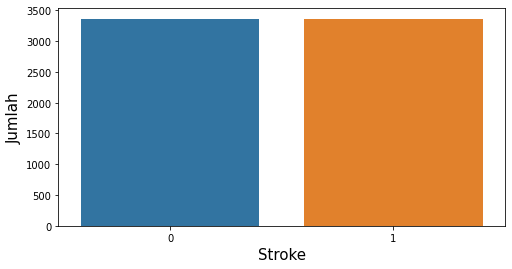

In [176]:
stroke_label = df_upsampled.stroke.value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(stroke_label.index, stroke_label);
plt.xlabel('Stroke', fontsize=15);
plt.ylabel('Jumlah', fontsize=15)

## Melihat visualisasi distribusi kolom numerikal setelah diupsample

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


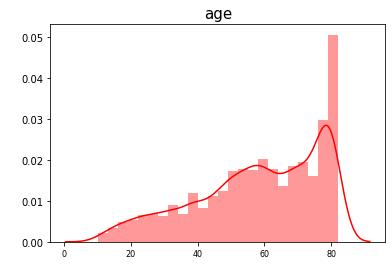

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


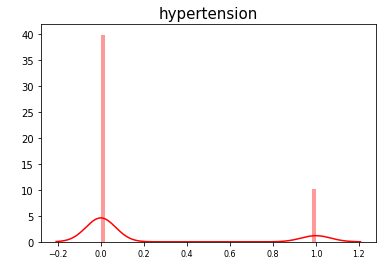

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


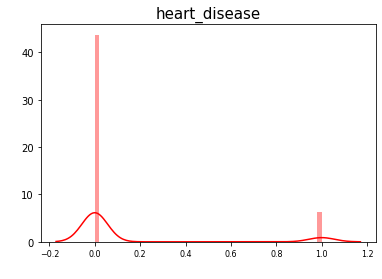

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


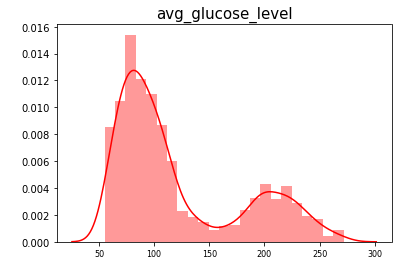

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


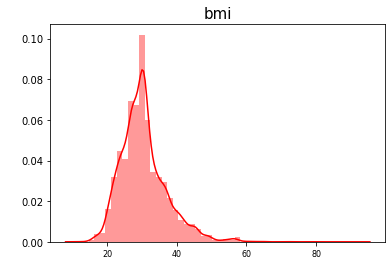

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


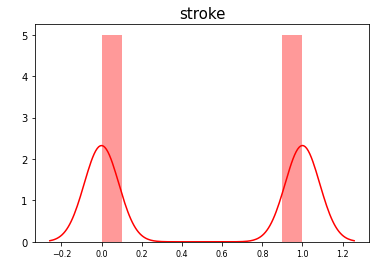

In [177]:
numerical = [col for col in df_upsampled.columns if col not in categorical]

for i in numerical:
    ax = sns.distplot(df_upsampled[i], color = 'red')
    plt.title('%s' %i, fontsize = 15)
    plt.xlabel(' ')
    plt.ylabel(' ')
    plt.xticks(fontsize = 8)
    plt.show();
    print('\n')

## Melihat distribusi kolom kategorikal setelah diupsample

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


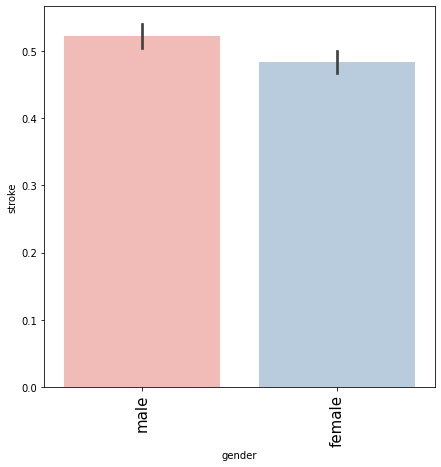

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


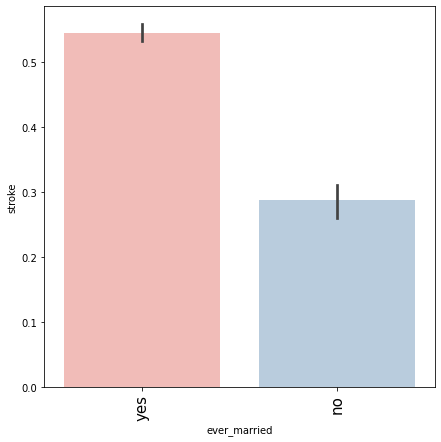

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


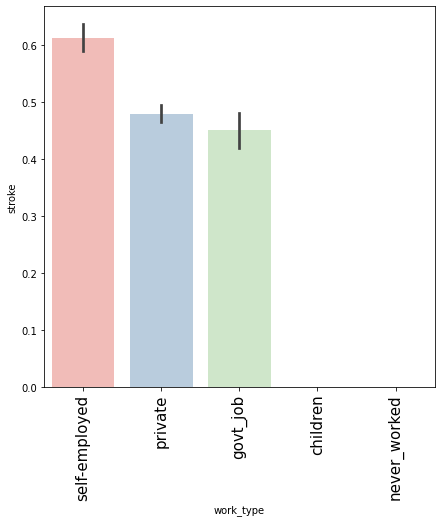

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


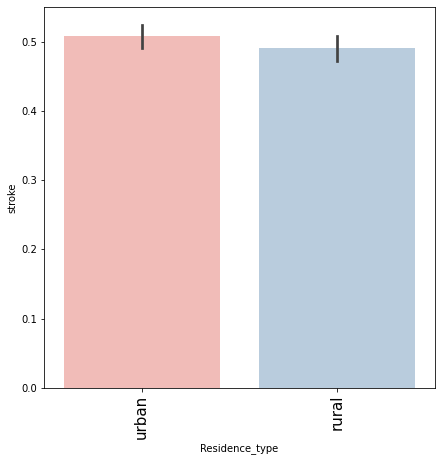

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


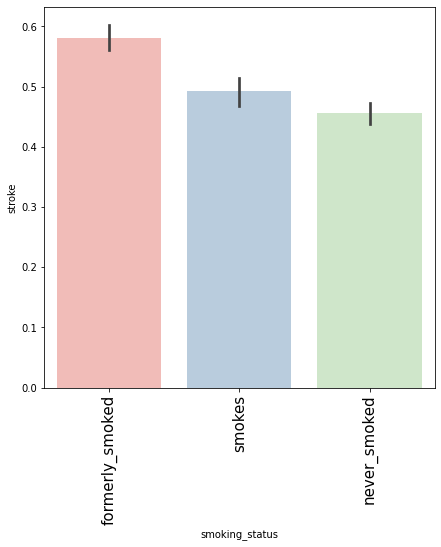

In [178]:
def sort_order(column):
    orders = (df_upsampled.groupby([column]).mean().sort_values(by ='stroke', ascending = False)).index
    return orders

for i in categorical:
    if df_upsampled[i].nunique() < 20:
        f,ax=plt.subplots(figsize=(7,7))
        sns.barplot(df_upsampled[i],df_upsampled['stroke'], order = sort_order(i), palette='Pastel1')
        plt.xlabel('%s'%i)
        plt.ylabel('stroke')
        plt.xticks(fontsize = 15, rotation = 90)
        plt.show();
        print('\n')

### Korelasi makriks setelah dilakukan upsample

Text(0.5, 1.0, 'Correlation Matrix')

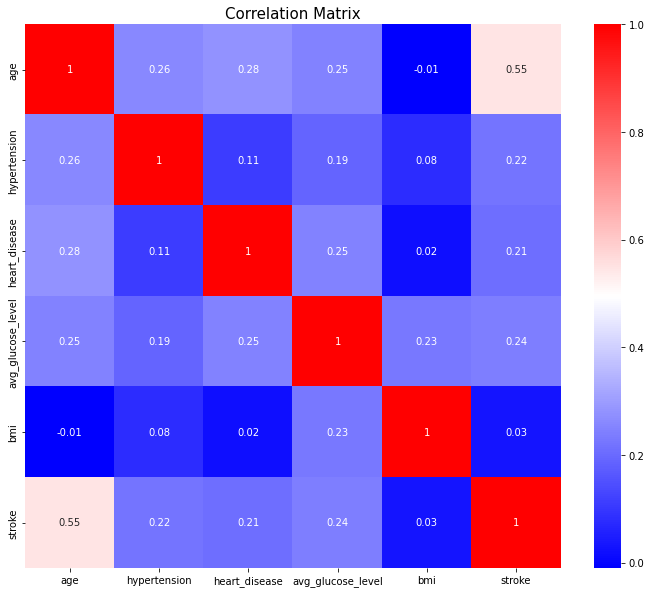

In [179]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_upsampled.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr')
plt.title('Correlation Matrix', size=15)

In [180]:
df_upsampled.corr()['stroke'].sort_values(ascending=False)[1:]

age                  0.552833
avg_glucose_level    0.243669
hypertension         0.222758
heart_disease        0.208730
bmi                  0.025806
Name: stroke, dtype: float64

## Mendeteksi Outliers

In [181]:
def outlier(data1):
    sorted(data1)
    Q1,Q3 = np.nanpercentile(data1, [25,75])
    IQR = Q3 - Q1
    lowerRange = Q1 - (1.5 * IQR)
    upperRange = Q3 + (1.5 * IQR)

    return lowerRange,upperRange

In [182]:
df_upsampled.value_counts('stroke')

stroke
1    3364
0    3363
dtype: int64

### Melihat visualisasi distribusi fitur sebelum outliers dihapus

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

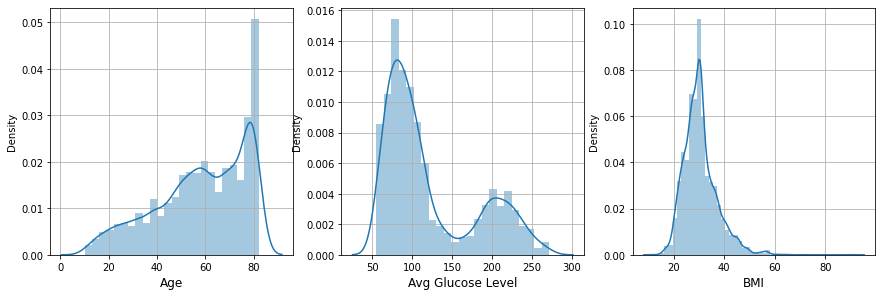

In [183]:
plt.figure(figsize=(20,10))

plt.subplot(2,4,1)
sns.distplot(df_upsampled['age'])
plt.xlabel('Age',fontsize = 12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(df_upsampled['avg_glucose_level'])
plt.xlabel('Avg Glucose Level',fontsize = 12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(df_upsampled['bmi'])
plt.xlabel('BMI',fontsize = 12)
plt.grid()

plt.show()

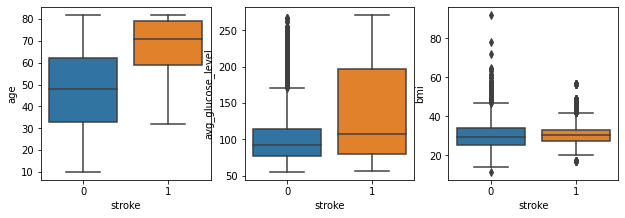

In [184]:
def graph(y):
    sns.boxplot(x="stroke", y=y, data=df_upsampled)
  
plt.figure(figsize=(14,7))
      
plt.subplot(2,4,1)
graph('age')
  
plt.subplot(2,4,2)
graph('avg_glucose_level')
  
plt.subplot(2,4,3)
graph('bmi')
  
plt.show()

In [185]:
lr,ur=outlier(df_upsampled['avg_glucose_level'][df_upsampled.stroke==0])
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level > ur) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level < lr) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.value_counts('stroke')

stroke
1    3364
0    2915
dtype: int64

In [186]:
lr,ur=outlier(df_upsampled['avg_glucose_level'][df_upsampled.stroke==0])
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level > ur) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level < lr) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.value_counts('stroke')

stroke
1    3364
0    2829
dtype: int64

In [187]:
lr,ur=outlier(df_upsampled['bmi'][df_upsampled.stroke==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi > ur) & (df_upsampled.stroke == 1)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi < lr) & (df_upsampled.stroke == 1)],inplace=True)
df_upsampled.value_counts('stroke')

stroke
1    3177
0    2829
dtype: int64

In [188]:
lr,ur=outlier(df_upsampled['bmi'][df_upsampled.stroke==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi > ur) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi < lr) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.value_counts('stroke')

stroke
1    3177
0    2497
dtype: int64

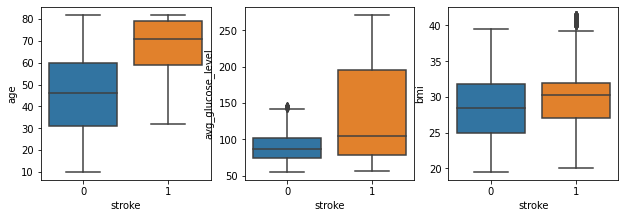

In [189]:
def graph(y):
    sns.boxplot(x="stroke", y=y, data=df_upsampled)
  
plt.figure(figsize=(14,7))
      
plt.subplot(2,4,1)
graph('age')
  
plt.subplot(2,4,2)
graph('avg_glucose_level')
  
plt.subplot(2,4,3)
graph('bmi')
  
plt.show()

In [190]:
lr,ur=outlier(df_upsampled['bmi'][df_upsampled.stroke==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi > ur) & (df_upsampled.stroke == 1)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi < lr) & (df_upsampled.stroke == 1)],inplace=True)
df_upsampled.value_counts('stroke')

stroke
1    3076
0    2497
dtype: int64

In [191]:
lr,ur=outlier(df_upsampled['avg_glucose_level'][df_upsampled.stroke==0])
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level > ur) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level < lr) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.value_counts('stroke')

stroke
1    3076
0    2474
dtype: int64

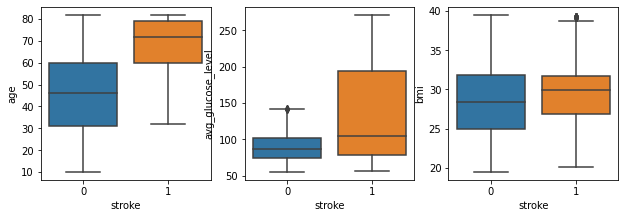

In [192]:
def graph(y):
    sns.boxplot(x="stroke", y=y, data=df_upsampled)
  
plt.figure(figsize=(14,7))
      
plt.subplot(2,4,1)
graph('age')
  
plt.subplot(2,4,2)
graph('avg_glucose_level')
  
plt.subplot(2,4,3)
graph('bmi')
  
plt.show()

In [193]:
lr,ur=outlier(df_upsampled['avg_glucose_level'][df_upsampled.stroke==0])
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level > ur) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level < lr) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.value_counts('stroke')

stroke
1    3076
0    2469
dtype: int64

In [194]:
lr,ur=outlier(df_upsampled['bmi'][df_upsampled.stroke==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi > ur) & (df_upsampled.stroke == 1)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi < lr) & (df_upsampled.stroke == 1)],inplace=True)
df_upsampled.value_counts('stroke')

stroke
1    3057
0    2469
dtype: int64

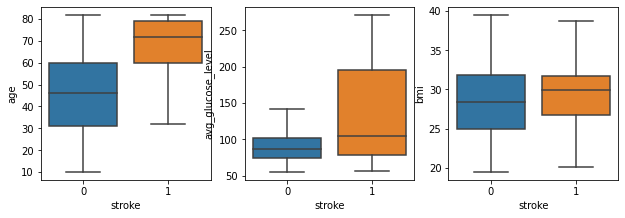

In [195]:
def graph(y):
    sns.boxplot(x="stroke", y=y, data=df_upsampled)
  
plt.figure(figsize=(14,7))
      
plt.subplot(2,4,1)
graph('age')
  
plt.subplot(2,4,2)
graph('avg_glucose_level')
  
plt.subplot(2,4,3)
graph('bmi')

### Melihat visualisasi distribusi fitur setelah outliers dihapus

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

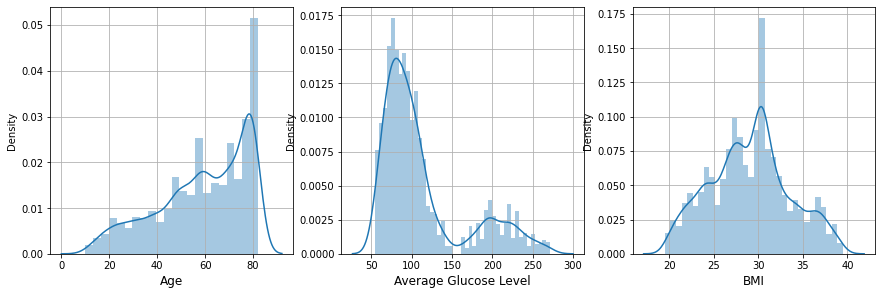

In [196]:
plt.figure(figsize=(20,10))

plt.subplot(2,4,1)
sns.distplot(df_upsampled['age'])
plt.xlabel('Age',fontsize = 12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(df_upsampled['avg_glucose_level'])
plt.xlabel('Average Glucose Level',fontsize = 12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(df_upsampled['bmi'])
plt.xlabel('BMI',fontsize = 12)
plt.grid()

plt.show()

In [197]:
df_upsampled.reset_index(drop=True,inplace=True)

### One Hot Encoding

Teknik dilakukan pada data kategorikal agar datanya berubah menjadi data numerikal

In [198]:
final=pd.get_dummies(df_upsampled, columns=['gender','ever_married','work_type','Residence_type','smoking_status'])
final.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_female,gender_male,ever_married_no,ever_married_yes,work_type_children,work_type_govt_job,work_type_never_worked,work_type_private,work_type_self-employed,Residence_type_rural,Residence_type_urban,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,58.0,1,0,87.96,39.2,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0
1,70.0,0,0,69.04,35.9,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0
2,32.0,0,0,77.67,32.3,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1
3,79.0,0,1,57.08,22.0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0
4,37.0,0,0,73.50,26.1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0


### Melihat matriks korelasi setelah dilakukan encoding

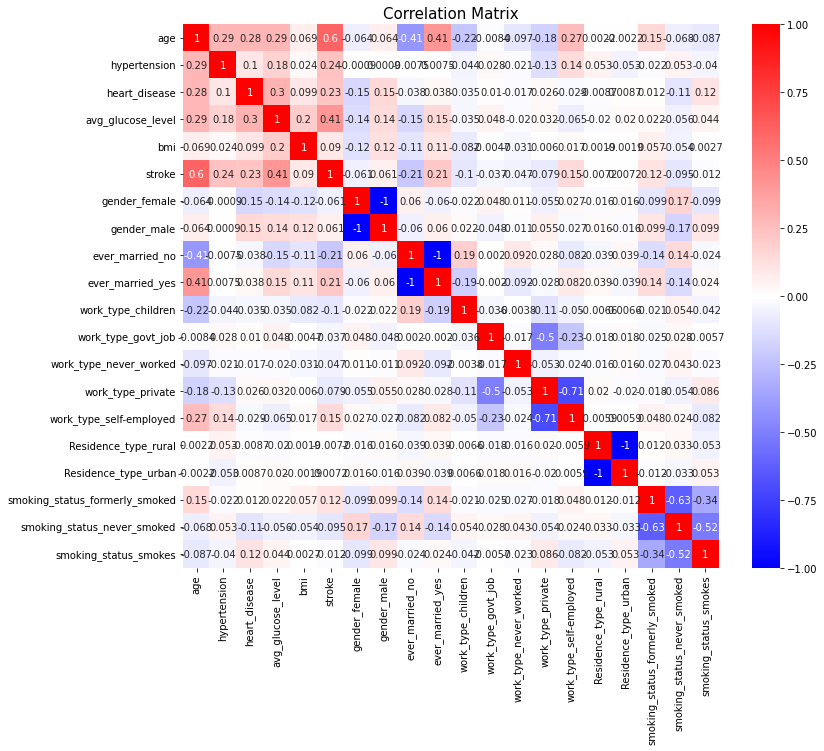

In [199]:
plt.figure(figsize=(12,10))
sns.heatmap(final.corr(), annot=True, cmap='bwr');
plt.title('Correlation Matrix', fontsize=15);

### Melihat fitur apa saja yang memiliki peran penting

Teknik ini dilakukan untuk melihat fitur apa saja yang memiliki peranan penting untuk membuat model

In [200]:
final.corr()['stroke'].sort_values(ascending=False)[1:]

age                               0.602519
avg_glucose_level                 0.411220
hypertension                      0.239688
heart_disease                     0.230949
ever_married_yes                  0.213223
work_type_self-employed           0.145294
smoking_status_formerly_smoked    0.115722
bmi                               0.090434
gender_male                       0.061430
Residence_type_urban              0.007242
Residence_type_rural             -0.007242
smoking_status_smokes            -0.012170
work_type_govt_job               -0.036957
work_type_never_worked           -0.047378
gender_female                    -0.061430
work_type_private                -0.079036
smoking_status_never_smoked      -0.094842
work_type_children               -0.099688
ever_married_no                  -0.213223
Name: stroke, dtype: float64

In [201]:
feature_final=final[['age','hypertension','heart_disease','avg_glucose_level','bmi','gender_female','gender_male','ever_married_no','ever_married_yes','work_type_children','work_type_govt_job','work_type_never_worked','work_type_private','work_type_self-employed','Residence_type_rural','Residence_type_urban','smoking_status_formerly_smoked','smoking_status_never_smoked','smoking_status_smokes']]
target=final[['stroke']]

Digunakan RandomForestClassifier untuk mengecek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


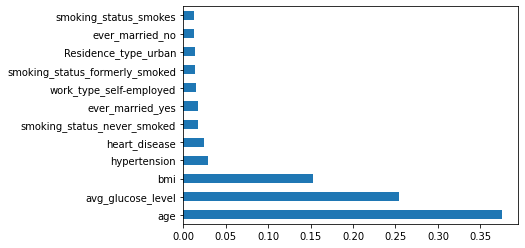

In [202]:
rf = RandomForestClassifier()
rf_model=rf.fit(feature_final,target)
feat_importances = pd.Series(rf_model.feature_importances_, index=feature_final.columns)
feat_importances.nlargest(12).plot(kind='barh')

Berdasarkan data di atas, dapat disimpulkan bahwa fitur Age, Average Glucose Level, dan BMI memiliki peranan yang sangat penting untuk digunakan dalam membuat model machine learning

### Membagi dataset, kemudian lakukan normalisasi

In [203]:
final_features=final[['age', 'avg_glucose_level', 'bmi']]
target = final['stroke']

In [204]:
X_train, X_test, y_train, y_test = train_test_split(final_features,target,test_size = 0.2,random_state =2)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modeling

### Menggunakan Random Forest Classifier

Dalam mengimplementasikan algoritma Random Forest, saya menggunakan method RandomForestClassifier dari sklearn.ensemble dengan argumen n_estimators=30 dan max_features=3. Kelebihan dari algoritma yang ini adalah dapat memperkiraan variabel apa yang penting dalam klasifikasi, sedangkan kekurangan dari algoritma ini yaitu memiliki kompleksitas yang tinggi.

In [205]:
rf = RandomForestClassifier(n_estimators=30, max_features=3, random_state=0).fit(X_train_scaled, y_train)
rf_pred= rf.score(X_test_scaled, y_test)


rf_train_accuracy =rf.score(X_train_scaled,y_train)
rf_accuracy = rf.score(X_test_scaled,y_test)
pred_prob_rf = rf.predict_proba(X_test_scaled)


print("Training score: {}".format(rf.score(X_train_scaled, y_train)))
print("Test score: {}".format(rf.score(X_test_scaled, y_test)))

Training score: 0.9997737556561086
Test score: 0.9755877034358047


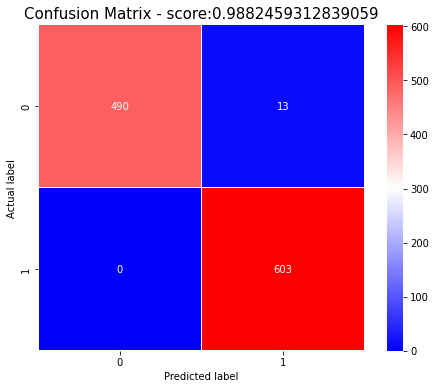

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       503
           1       0.98      1.00      0.99       603

    accuracy                           0.99      1106
   macro avg       0.99      0.99      0.99      1106
weighted avg       0.99      0.99      0.99      1106



In [206]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train_scaled,y_train)
y_pred=rf_model.predict(X_test_scaled)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'bwr');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

### Menggunakan KNeighbors Classifier

Dalam mengimplementasikan algoritma KNN, saya menggunakan method KNeighborsClassifier dari sklearn.neighbors dengan argumen n_neighbors=2. Kelebihan dari algoritma yang ini adalah cukup efektif terhadap data yang besar, sedangkan kekurangan dari algoritma ini yaitu perlu menentukan nilai parameter K terlebih dahulu.

In [207]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_pred=knn.score(X_test_scaled, y_test)

knn_train_accuracy =knn.score(X_train_scaled,y_train)
knn_accuracy = knn.score(X_test_scaled,y_test)
pred_prob_knn = knn.predict_proba(X_test_scaled)

print("Training score: {}".format(knn.score(X_train_scaled, y_train)))
print("Test score: {}".format(knn.score(X_test_scaled, y_test)))

Training score: 0.9556561085972851
Test score: 0.9412296564195298


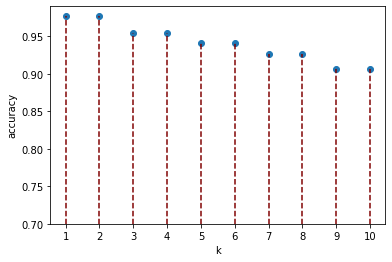

In [208]:
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed", colors='maroon')
plt.ylim(0.70,0.99)
plt.xticks([i for i in range(1,11)]);

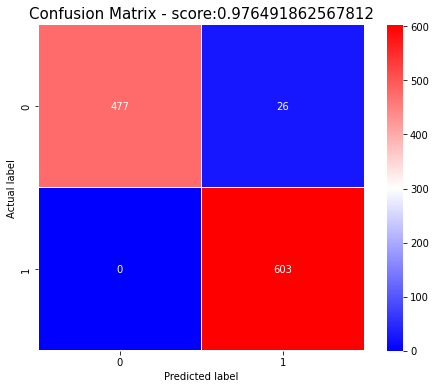

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       503
           1       0.96      1.00      0.98       603

    accuracy                           0.98      1106
   macro avg       0.98      0.97      0.98      1106
weighted avg       0.98      0.98      0.98      1106



In [209]:
knn_model=KNeighborsClassifier(n_neighbors = 2)
knn_model.fit(X_train_scaled,y_train)
y_pred=knn_model.predict(X_test_scaled)
from sklearn import metrics

knn_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(knn_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'bwr');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

## Evaluation

### Perbandingan Akurasi

In [210]:
Model_Name = ['Random Forest','KNeighbors']
Accuracy = [rf_pred,knn_pred]

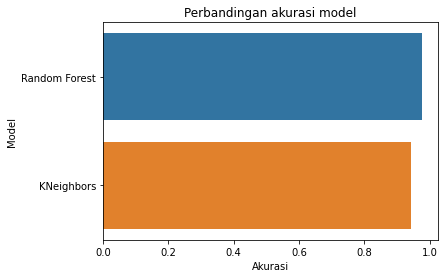

In [211]:
plt.bar
plt.title('Perbandingan akurasi model')
plt.xlabel('Akurasi')
plt.ylabel('Model')
sns.barplot(x = Accuracy,y = Model_Name)
plt.show()

Gambar 6. Perbandingan Akurasi


> Pada Gambar 6, dapat diketahui bahwa model dengan Random Forest memiliki akurasi yang lebih tinggi dibanding KNeighbors.

## **Terimakasih.**

## **Submission project kelas Machine Learning Terapan - 2022** 